# Regressão logística com Python

Para esta aula, estaremos trabalhando com o [Conjunto de dados do Titanic da Kaggle](https://www.kaggle.com/c/titanic). Este é um conjunto de dados muito famoso e muitas vezes é o primeiro passo em Machine Learning!

Vamos tentar montar um algoritmo para classificação de sobrevivente ou falecido utilizando regressão logística no Python.

Usaremos uma versão "semi-limpa" do conjunto de dados do Titanic. Se você usar o conjunto de dados hospedado diretamente no Kaggle, talvez seja necessário fazer uma limpeza adicional não mostrada neste notebook.

## Importar bibliotecas
Vamos importar algumas bibliotecas para começar!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Os dados

Vamos começar lendo o arquivo titanic_train.csv em um DataFrame pandas.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Análise exploratória

Vamos iniciar as análises. Começaremos por verificar os dados faltantes!

## Dados ausentes

Podemos usar seaborn para criar um mapa de calor simples para ver onde ocorre ausência dados!


**Atenção!** 

    Quando podemos lançar mão de imputação de dados e quando podemos desconsiderar esse procedimento?


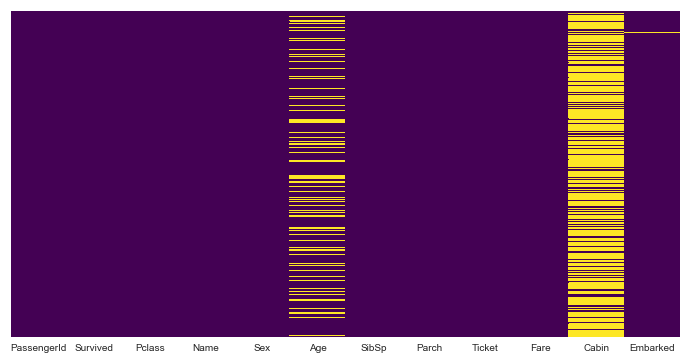

In [73]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Aproximadamente 20% dos dados de idade estão faltando. A proporção de idade que falta é provavelmente pequena o suficiente para que possamos fazer uma substituição razoável com alguma forma de imputação de dados. 

Olhando para a coluna Cabin, porém, parece que estamos perdendo número significativo de dados para realizarmos o mesmo procedimento. Provavelmente vamos descartar essa feature ou classificá-la para uma codificação de interesse, ex.: "Cabin Conhecido: 1 ou 0"

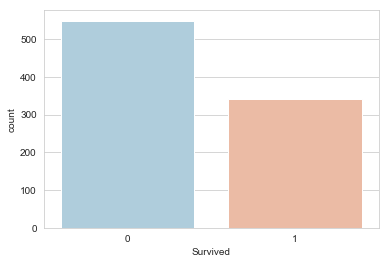

In [74]:
sns.set_style('whitegrid') #gera um gride para receber as barras do gráfico
sns.countplot(x='Survived',data=train,palette='RdBu_r') #definindo apaleta de cores azul e vermelho

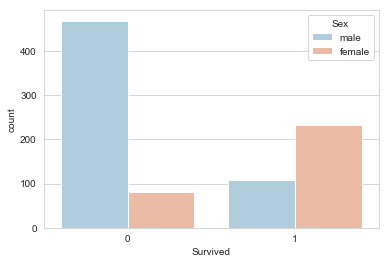

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

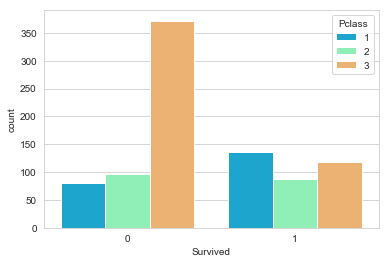

In [76]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

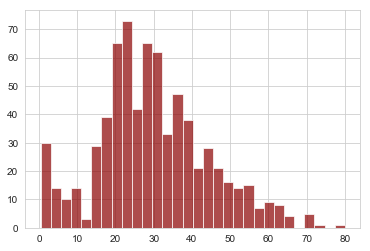

In [77]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

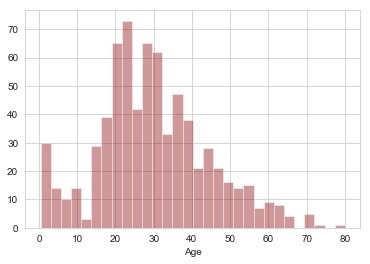

In [78]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

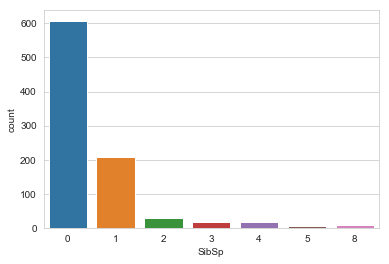

In [79]:
sns.countplot(x='SibSp',data=train)

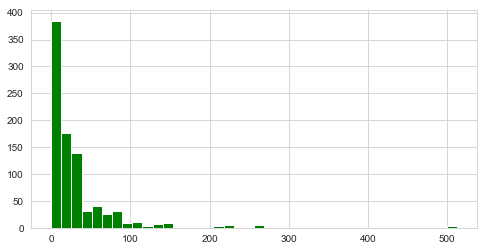

In [80]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

___
## Limpando os dados

Queremos preencher dados faltantes da variável idade, em vez de simplesmente considerar as linhas de dados de idade que faltam. Uma maneira de fazer isso é preenchendo a idade média de todos os passageiros (imputação).
No entanto, podemos ser mais inteligentes sobre isso e verificar a idade média pela classe de passageiros. Por exemplo:


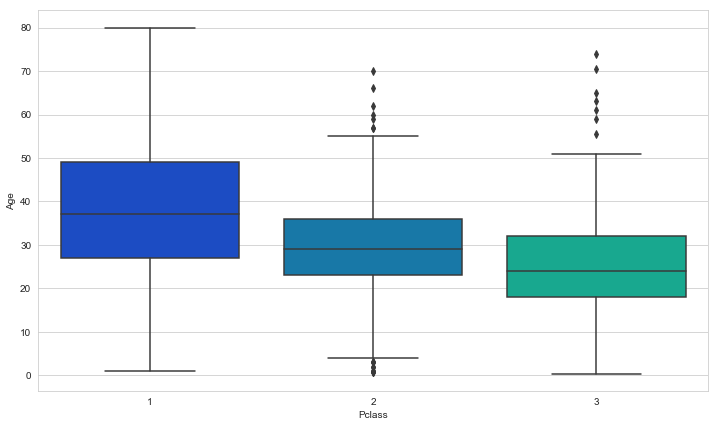

In [81]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Podemos ver os passageiros mais ricos (que estão nas classes superiores) tendem a ser mais velhos. Usaremos esses valores de idade média para imputar com base em Pclass for Age.

In [82]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Agora aplique essa função!

In [83]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Agora vamos verificar esse mapa de calor novamente!

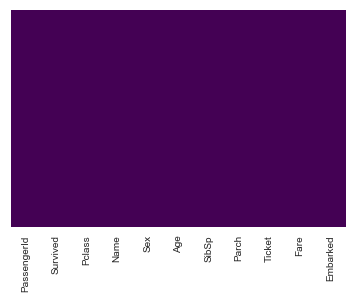

In [88]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Ótimo! Vamos seguir em frente e deletar a coluna Cabin e a linha em Embarked que falta dado.

In [85]:
del train['Cabin']
#train.drop('Cabin',axis=1,inplace=True)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [87]:
train.dropna(inplace=True)

## Convertendo recursos categóricos

Precisamos converter características categóricas em variáveis dummy usando pandas! Caso contrário, nosso algoritmo de Machine Learning não será capaz de aceitar esses recursos diretamente como entradas.

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [26]:
sex = pd.get_dummies(train['Sex'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [27]:
train.drop(['Sex','PassengerId','Embarked','Name','Ticket'],axis=1,inplace=True)

In [28]:
train = pd.concat([train,sex,embark],axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Ótimo! Nossos dados estão prontos para o nosso modelo

# Construindo um modelo de Regressão Logística

Vamos começar dividindo nossos dados em um conjunto de treinamento e conjunto de testes (há outro arquivo test.csv que você pode usar, caso queira usar todos esses dados para treinar).

## Divisão treino-teste

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
predictions = logmodel.predict(X_test)

Vamos seguir em frente para avaliar o nosso modelo!

## Avaliação

Podemos verificar a precisão, o recall e a f1 Score usando o relatório de classificação (*classification_report*)!

In [92]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
print(confusion_matrix(y_test,predictions))

[[151  12]
 [ 36  68]]


### Para exercitar

Explore outros recursos no mesmo dataset. Algumas sugestões:

* Tente pegar o título (Dr., Sr., Sra., Etc.) do nome como parâmetro.
* Talvez a cabine possa ser uma característica.
* Existe alguma informação que você pode obter do bilhete?